In [94]:
import sklearn as sk
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import os

In [95]:
dir = '/Users/fionshiau/Documents/2023Spring/Computational_Genomics/Final_Project/comp-geno-proj/'

In [96]:
dat = pd.read_csv(os.path.join(dir,'data','merged','1.4.0_train.csv'))

In [97]:
dat

,Unnamed: 0,chr,start,end,HiC_AB,H3K4me2,H3K9Ac,H3K4me3,ATAC-seq,H3K4me1,H3K27Ac,H3K27me3,RNAPol
0,chr1_0-5000,chr1,0,5000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,chr1_5000-10000,chr1,5000,10000,-0.014358,0.000000,0.000000,0.000000,0.474979,0.0,0.873456,0.000000,0.106125
2,chr1_10000-15000,chr1,10000,15000,-0.004929,0.204483,0.000000,0.043258,0.336872,0.0,0.219781,0.659145,0.600027
3,chr1_15000-20000,chr1,15000,20000,-0.004310,0.232708,0.314744,0.045658,0.023892,0.0,0.000000,0.000000,0.918754
4,chr1_20000-25000,chr1,20000,25000,-0.194548,0.000000,0.000000,0.000000,0.980893,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524851,chr9_141190000-141195000,chr9,141190000,141195000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
524852,chr9_141195000-141200000,chr9,141195000,141200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
524853,chr9_141200000-141205000,chr9,141200000,141205000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
524854,chr9_141205000-141210000,chr9,141205000,141210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [98]:
dat.iloc[:,4].max()

1.0

In [99]:
mat = dat.iloc[:,4:].to_numpy()

In [100]:
# normalize non-HiC column totals to 1e6
#mat[:,1:] = (mat[:,1:]/mat[:,1:].sum(axis=0))*1e6
# scale to range from 0 to 1 by min-max scaler
#from sklearn.preprocessing import Normalizer
#mat = np.hstack((mat[:,0].reshape(-1,1),Normalizer().fit_transform(X=mat[:,1:])))
#mat = Normalizer().fit_transform(X=mat)

In [101]:
gm = GaussianMixture(n_components = 6, random_state=0, warm_start=True)

In [102]:
gm.fit(mat)

GaussianMixture(n_components=6, random_state=0, warm_start=True)

In [103]:
gm.fit(pd.read_csv(os.path.join(dir,'data','merged','1.4.1_train.csv')).iloc[:,4:].to_numpy())

GaussianMixture(n_components=6, random_state=0, warm_start=True)

In [104]:
gm.fit(pd.read_csv(os.path.join(dir,'data','merged','1.4.2_train.csv')).iloc[:,4:].to_numpy())

GaussianMixture(n_components=6, random_state=0, warm_start=True)

In [88]:
mat.mean(axis=0)

array([-0.04812508,  0.24518988,  0.17258377,  0.17997432,  0.15939098,
        0.35634075,  0.2945738 ,  0.57657633,  0.15164139])

In [122]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0).fit_transform(mat)

In [108]:
labels = gm.predict(mat)

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

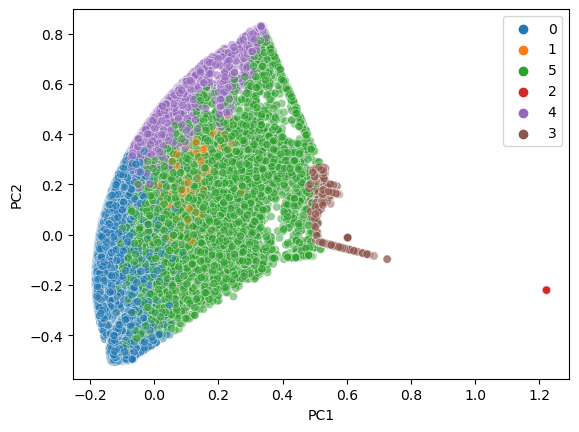

In [128]:
import seaborn as sns
rng = np.random.default_rng(0)
sample_indices = rng.choice(mat.shape[0],size=100000)
sns.scatterplot(
    x=pca[sample_indices,0], y=pca[sample_indices,1], 
    hue=labels[sample_indices].astype(str),alpha=0.5).set(xlabel='PC1',ylabel='PC2')

In [111]:
rng = np.random.default_rng(0)
sample_indices = rng.choice(mat.shape[0],size=100000)

In [112]:
import umap
umap_emb = umap.UMAP(random_state=0).fit_transform(mat[sample_indices,:])

<Axes: >

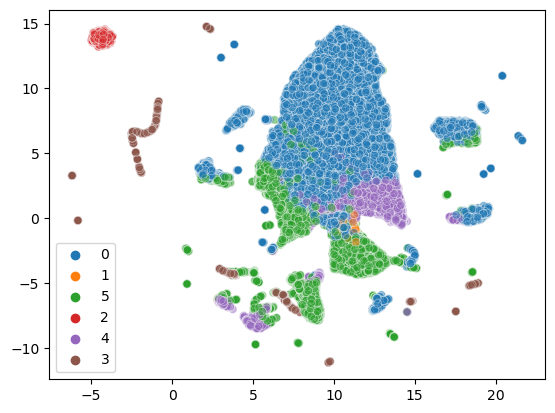

In [121]:
sns.scatterplot(x=umap_emb[:,0], y=umap_emb[:,1], hue=labels[sample_indices].astype(str),alpha=0.5)

In [38]:
mat.max(axis=0)

array([0.03519   , 0.01888758, 0.02628082, 0.02408263, 0.03745319,
       0.01384753, 0.04481674, 0.00634533, 0.16171585])

<Axes: >

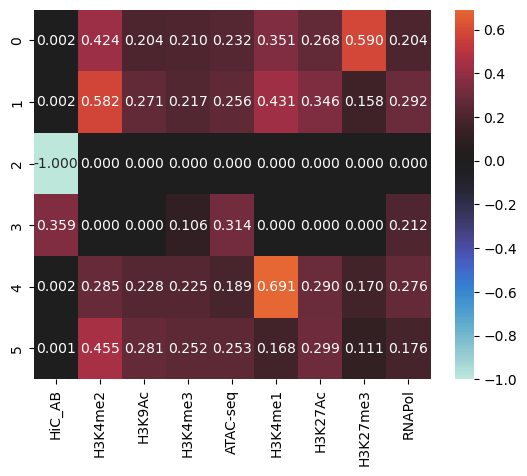

In [105]:
import seaborn as sns
sns.heatmap(gm.means_,xticklabels=dat.columns[4:],annot=True,fmt=".3f",center=0)

<Axes: >

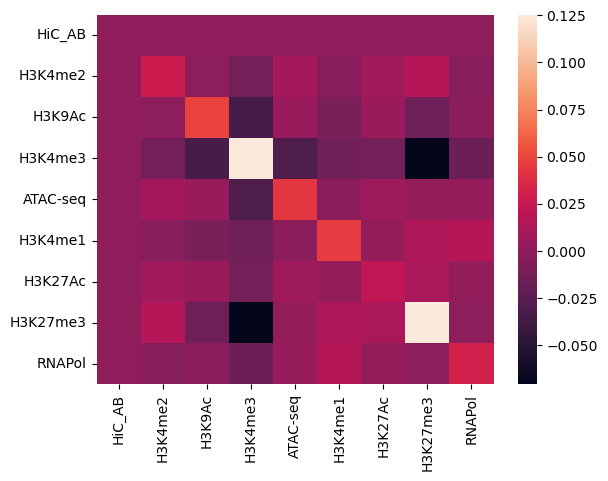

In [91]:
sns.heatmap(gm.covariances_[1],xticklabels=dat.columns[4:],yticklabels=dat.columns[4:])

In [41]:
gm.precisions_cholesky_[0].shape

(9, 9)

In [92]:
gm.means_[:,0]

array([ 0.00233169,  0.00113425, -1.        ,  0.35923181,  0.00199531])

In [106]:
import pickle
filename = './gm-final.sav'
pickle.dump(gm, open(filename, 'wb'))